## TSI TDMA output file configuration

**lines 1-18 : DMA standard configuration and experimental settings**

This is general DMA information, including model info
- 0	Sample File	P:\aerosols\private\Bret Hatzinger\Summer Work 2021\Internal Mixtures\0.1gL AmmSulf_Sucrose Internal Mix (6_7_21)\0.1gL AmmSulf_Sucrose Internal Mix (6_7_21).S80
- 1	Classifier Model	3080
- 2	DMA Model	3081
- 3	**DMA Inner Radius(cm)**	0.00937
- 4	**DMA Outer Radius(cm)**	0.01961
- 5	**DMA Characteristic Length(cm)**	0.44369
- 6	CPC Model	3776 Low Flow
- 7	**Reference Gas Viscosity (Pa*s)**	1.83E-05
- 8	**Reference Mean Free Path (m)**	6.73E-08
- 9	**Reference Gas Temperature (K)**	296.15
- 10	**Reference Gas Pressure (kPa)**	101.3
- 11	Channels/Decade	64
- 12	Multiple Charge Correction	TRUE
- 13	Nanoparticle Aggregate Mobility Analysis	FALSE
- 14	Diffusion Correction	TRUE
- 15	**Gas Density**	0.0012
- 16	Units	dw/dlogDp
- 17	Weight	Number

**lines 19-126 : Actual data collected for multiple scans**
- each row represents a dp midpoint value for the scan
- the value represents the cpc counts for that bin

Here are what the first several rows look like. The first three rows are the sample number and the time stamp for the scan. The fourth row is just a label for the remaining first column

- 18	Sample #	1
- 19	Date	6/7/21
- 20	Start Time	14:16:57
- 21	Diameter Midpoint
- 22	8.2	1.39E+06
- 23	8.51	931386
- 24	8.82	418658
- 25	9.14	582892

**lines 127-151 : More experiment settings**

The following are settings for the scanning DMA.

- 126	**Scan Up Time(s)**	120
- 127	**Retrace Time(s)**	15
- 128	Down Scan First	FALSE
- 129	Scans Per Sample	1
- 130	Impactor Type(cm)	0.071
- 131	**Sheath Flow(lpm)**	7.99998
- 132	**Aerosol Flow(lpm)**	0.3
- 133	**CPC Inlet Flow(lpm)**	0.3
- 134	CPC Sample Flow(lpm)	0.05
- 135	**Low Voltage**	10.0272
- 136	**High Voltage**	9530.41
- 137	**Lower Size(nm)**	8.05842
- 138	**Upper Size(nm)**	339.821
- 139	Density(g/cc)	1
- 140	Title
- 141	**Status Flag**	Normal Scan
- 142	td(s)	4.3
- 143	tf(s)	2.99021
- 144	D50(nm)	1415.69
- 145	Median(nm)	33.4426
- 146	Mean(nm)	39.529
- 147	Geo. Mean(nm)	32.317
- 148	Mode(nm)	35.8664
- 149	Geo. Std. Dev.	1.90518
- 150	Total Concentration(#/cm≥)	1.86E+06

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import sys
import os

In [3]:
# Add the path where all python *packages* are located
#sys.path.insert(1, '../code/model/')

from htdma_code.model.model import Model

In [4]:
#os.chdir("/Users/brk009/PycharmProjects/ChemicsCurveFit")
print(os.getcwd())


C:\Users\brk009\Documents\PycharmProjects\HTDMA\notebooks


In [5]:
#filename = "../data/0.1gL AmmSulf_Sucrose Internal Mix (6_7_21).txt"
#filename = "../data/A-Pinene Carene 100.100.200ppb (7.14.txt"
#filename = "../data/HTDMA 0.1gL AmmSulf200nmPSL Sample Peaks.txt"
#filename = "../data/20220621 data/0.1gL 25 AS_75 SA.txt"
filename = "../data/20220621 data/0.1gL 50 AS_50 SA.txt"
#setup = model.Setup(filename)

model = Model()
model.process_new_file(filename)

In [6]:
print(model.setup)

DMA:
  r_in_cm: 0.937
  r_out_cm: 1.961
  length_cm: 44.369
RunParams:
  gas viscosity: 1.83245e-05
  gas density: 0.0012
  mean free path: 6.73e-08
  temp (K): 296.15
  pres (kPa): 101.3
  rh (%): 85.0
scan #: 1
scan up (sec): 120.0
scan down (sec): 15.0
low V: 10.5317
high V: 9962.35
low dp: 10.7461
high dp: 486.968
q_sh_lpm (lpm): 5.0
q_aIn_lpm (polydisperse) (lpm): 0.3
q_aOut_lpm (monodisperse) (lpm): 0.3
total conc: 23132.9
STATUS: Normal Scan



In [7]:
print(model.scans)

Scans:
  Index: Index(['Date', ' 10.9', ' 11.3', ' 11.8', ' 12.2', ' 12.6', ' 13.1', ' 13.6',
       ' 14.1', ' 14.6',
       ...
       'td(s)', 'tf(s)', 'D50(nm)', 'Median(nm)', 'Mean(nm)', 'Geo. Mean(nm)',
       'Mode(nm)', 'Geo. Std. Dev.', 'Total Concentration(#/cm³)', 'Comment'],
      dtype='object', name='Sample #', length=133)
  Columns: Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')
  Num Rows: 133
  Num Cols: 21
  Num dp values: 106



---
# DMA 1

In [8]:
print(model.dma1)

q_sh_lineedit = 5.0 lpm 83.33 cm3/sec
q_aIn_lineedit = 0.3 lpm 0.30 cm3/sec
q_aOut_lineedit = 0.3 lpm 0.30 cm3/sec
q_excess_lineedit = 5.0 lpm 83.33 cm3/sec
gas viscosity = 0.0001832 Poise
mean free path = 67.300 nm
Voltage = 5000.0 V
dp 320.5 nm
WILL USE:
dma1 length: 44.369 cm
dma1 radius In 0.937 cm
dma1 radius Out 1.961 cm



In [9]:
# Example of working with a DMA_1 object

model.dma1.update_voltage(5000)
print(model.dma1)

q_sh_lineedit = 5.0 lpm 83.33 cm3/sec
q_aIn_lineedit = 0.3 lpm 0.30 cm3/sec
q_aOut_lineedit = 0.3 lpm 0.30 cm3/sec
q_excess_lineedit = 5.0 lpm 83.33 cm3/sec
gas viscosity = 0.0001832 Poise
mean free path = 67.300 nm
Voltage = 5000.0 V
dp 320.5 nm
WILL USE:
dma1 length: 44.369 cm
dma1 radius In 0.937 cm
dma1 radius Out 1.961 cm



In [10]:
# When update is called, a new dp center and fwhh is computed

print("dp = {:.1f}".format(model.dma1.dp_dist_center))

dp = 320.5


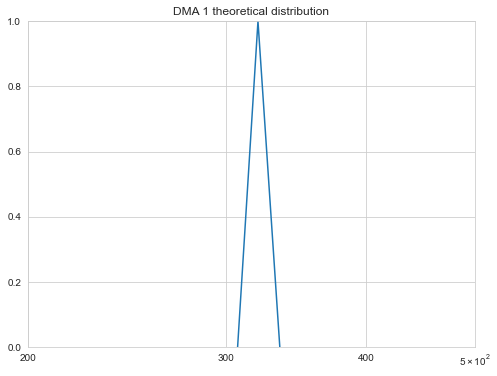

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
plt.style.use('seaborn-whitegrid')

model.dma1.plot(ax)
plt.show()

---
# DMA 2

## Working with one scan

In [12]:
# let's grab one sample from the file

# sample_num represents the sample in the dataframe of all samples we'll extract
scan_column = 0

result = model.select_scan(scan_column)
if result is False:
    print("WOAH - bad scan_column value!")
else:
    print("current scan updated in model")

current scan updated in model


### Graphing a single scan

You'll notice that the data is very skewed when you do not properly map to logspace



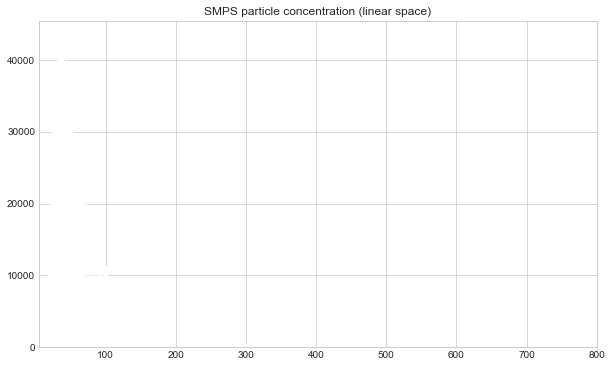

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.bar(x=model.current_scan.get_dp_range(),
       height=model.current_scan.get_values(),
       fill=True)
ax.set_xlim(5,800)

plt.title("SMPS particle concentration (linear space)")
plt.show()


Now, let's replot in log space

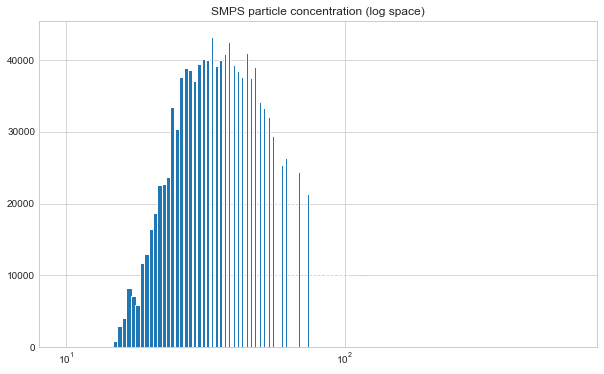

In [14]:
# Let's redo that, but plot in log space

fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_xscale('log')
ax.bar(x=model.current_scan.get_dp_range(),
       height=model.current_scan.get_values(),
       #width=1,
       fill=True)
ax.set_xlim(8,800)

plt.title("SMPS particle concentration (log space)")
plt.show()

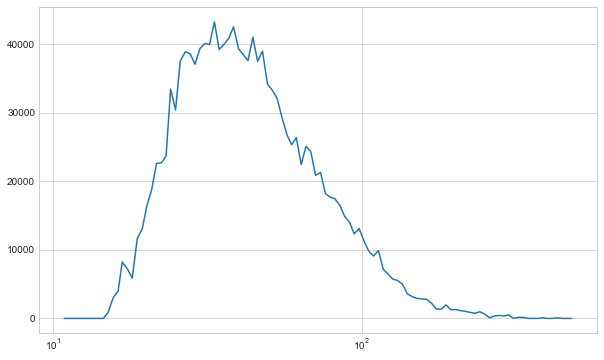

In [15]:
# Plot as a line
fig = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.set_xscale('log')
ax.plot(model.current_scan.get_dp_range(),
        model.current_scan.get_values())
plt.show()

---
# Curve Fit

Let's recall the standard normal distribution as defined by the quintessential probability density function:
- https://en.wikipedia.org/wiki/Normal_distribution

- $f(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$

I'm following lots of ideas online of basic gaussian curve fits

- http://www.emilygraceripka.com/blog/16


The scipy package has a decent curve fit function.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit


In [16]:
num_peaks = 2

In [17]:
from htdma_code.model.scan import calc_moving_ave

xdata = model.current_scan.get_log_dp_range()
ydata = model.current_scan._y_filtered
ydata_smoothed = calc_moving_ave(ydata,3)


In [18]:
ydata

array([    0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
           0.    ,     0.    ,     0.    ,     0.    ,   831.766 ,
        2987.76  ,  4040.22  ,  8233.5   ,  7144.23  ,  5877.22  ,
       11692.    , 13032.6   , 16458.6   , 18689.9   , 22603.7   ,
       22694.    , 23720.8   , 33447.8   , 30412.7   , 37569.6   ,
       38904.7   , 38571.7   , 37080.8   , 39384.1   , 40113.7   ,
       39943.1   , 43254.7   , 39222.    , 40003.6   , 40863.9   ,
       42535.3   , 39322.9   , 38493.7   , 37613.9   , 41012.2   ,
       37515.5   , 38986.4   , 34190.7   , 33307.    , 32118.1   ,
       29421.3   , 26862.    , 25327.9   , 26375.    , 22464.9   ,
       25092.3   , 24362.9   , 20880.6   , 21281.3   , 18213.9   ,
       17703.6   , 17447.2   , 16495.8   , 14853.8   , 14069.3   ,
       12335.2   , 13118.8   , 11332.6   ,  9820.65  ,  9103.68  ,
        9893.4   ,  7166.76  ,  6461.45  ,  5734.83  ,  5527.84  ,
        4973.39  ,  3590.39  ,  3167.43  ,  2922.67  ,  2841.1

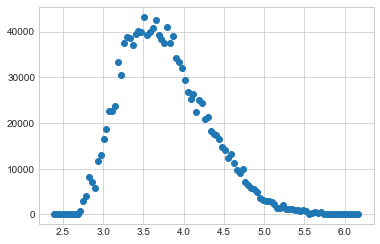

In [19]:
plt.scatter(xdata,ydata)

In [20]:
import scipy.signal

#i_pk = scipy.signal.find_peaks_cwt(ydata,widths=range(3,10))
i_pk, _ = scipy.signal.find_peaks(ydata_smoothed,
                                  # Vertical distance of the peak to neighbor samples
                                  threshold=(0,(ydata.max()-ydata.min())/4),
                                  # distance to neighbor peaks in samples
                                  distance=10,
                                  # width of the peak in samples
                                  width=1,
                                  # Relative height at which width is measured as a percentage of
                                  # its prominence
                                  rel_height=0.2,
                                  # prominence of the peak
                                  # - how much a peak stands out from the surrounding baseline
                                  #   of the signal and is defined as the vertical distance between
                                  #   the peak and its lowest contour line
                                  prominence=((ydata.max() - ydata.min()) / 10,
                                              (ydata.max() - ydata.min()))
                                  )
i_pk

array([34], dtype=int64)

In [21]:
sorted(i_pk,key=lambda x: ydata[x],reverse=True)

[34]

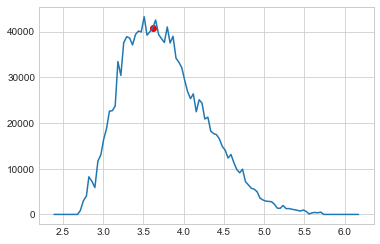

In [22]:
fig, ax = plt.subplots()
ax.plot(xdata,ydata)
ax.scatter(xdata[i_pk],ydata[i_pk],c='r')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Starting fit
xdata.shape = (106,)
ydata.shape = (106,)
xdata_width = 3.7814753614511534
find_peaks found 1 peaks
p0_init = [40863.9, 3.616308761279101, 0.18907376807255769]
min bounds = [4086.3900000000003, 3.4272349932065436, 0.03781475361451153]
max bounds = [61295.850000000006, 3.8053825293516588, 0.7562950722902307]
Predicting 1 : parameters:
0:
  dp:     39.494
  sd:     26.341
  height: 53108.964
  fwhh:   62.029
  gf:     0.000
  kappa:  0.000

rmse: 28204.251
Durbin-Watson: 0.362
Generating plot...


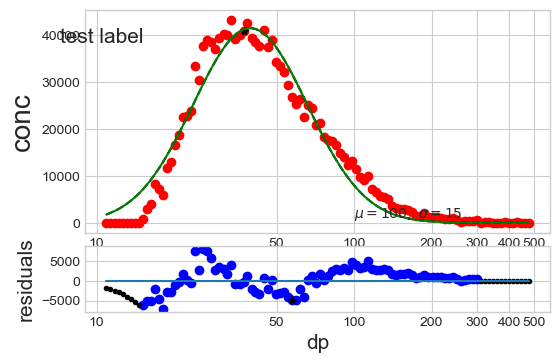

find_peaks found 2 peaks
p0_init = [40863.9, 3.616308761279101, 0.18907376807255769]
min bounds = [4086.3900000000003, 3.4272349932065436, 0.03781475361451153]
max bounds = [61295.850000000006, 3.8053825293516588, 0.7562950722902307]
p0_init = [0.0, 2.681021528714291, 0.18907376807255769]
min bounds = [0.0, 1.92472645642406, 0.03781475361451153]
max bounds = [0.0, 3.4373166010045217, 0.7562950722902307]


ValueError: Each lower bound must be strictly less than each upper bound.

In [23]:
from htdma_code.view.plot_utils import plot_scan_and_residuals

model.current_scan.fit(num_peaks_desired=num_peaks,verbose=True,
                       plot_steps = True,
                       plot_func=plot_scan_and_residuals)
#plt.show()

## Study of residuals

Clearly, the residual plot can be used to help identify whether there is a subtle shoulder.

In [28]:
from htdma_code.model.scan import predict_peaks

ydata = model.current_scan.total_fit_result.residuals_smoothed

# i_pk = predict_peaks(model.current_scan.total_fit_result.residuals,is_scan=False)

ydata = np.multiply(ydata,-1.0)
# ydata = np.convolve(ydata,np.ones(3),'valid')/3
# ydata = np.append([0],ydata)
# ydata = np.append(ydata,[0])

i_pk, other = scipy.signal.find_peaks(ydata,
                                  threshold=(0,(ydata.max()-ydata.min())/4),  # Vertical distance to neighbor samples- we want it close!
                                  distance=10, # distance to neighbor peaks
                                  width=3, # width of the peak in samples
                                  rel_height = 0.2,
        prominence = ((ydata.max() - ydata.min()) / 20,
                      (ydata.max() - ydata.min()))
                                      )

i_pk = sorted(i_pk, key=lambda x: ydata[x],reverse=True)
ydata = model.current_scan.total_fit_result.residuals

display(i_pk)
display(other)

[48]

{'left_thresholds': array([2161.88320851]),
 'right_thresholds': array([1514.51846027]),
 'prominences': array([34751.67807313]),
 'left_bases': array([37], dtype=int64),
 'right_bases': array([59], dtype=int64),
 'widths': array([4.94780255]),
 'width_heights': array([15422.89839556]),
 'left_ips': array([45.59887281]),
 'right_ips': array([50.54667536])}

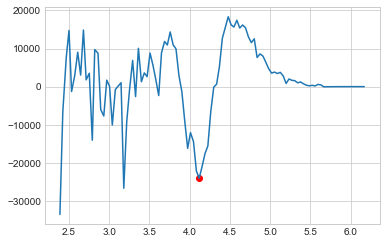

In [29]:
fig, ax = plt.subplots()
ax.plot(xdata,ydata)
ax.scatter(xdata[i_pk],ydata[i_pk],c='r')

---

# TODO

I think I have a good fit algorithm. Look at the narrow peak RMSE value I created in scan.py inside the fit....

This is basically choosing to compute RMSE only +/- 1 s.d. around each peak mean

---

In [25]:
model.current_scan.get_fit_peak_dp()

2


array([ 87.20504968, 143.57599491])

In [36]:
fig, ax = model.current_scan.plot()
plt.show()

TypeError: plot() missing 2 required positional arguments: 'ax_data' and 'ax_residuals'

In [ ]:
    # def _find_row_of_bottom_config_info(self,filename) -> int:
    #     """
    #     Helper function - find the row number after the samples
    #     :param filename:
    #     :return: the row number
    #     :raise: IOError - if the line could not be found
    #     """
    #
    #     f = open(filename, 'r')
    #     count = 0
    #     while True:
    #         line = f.readline()
    #         if not line:
    #             raise IOError("Run config info could not be found")
    #         line = line.strip()
    #
    #         # Look for the row "Scan Up Time(s)". Scan Up is sufficient
    #         if line.startswith("Scan Up"):
    #             bottom_config_rownum = count-1
    #             break
    #         count += 1
    #     f.close()
    #     return bottom_config_rownum

        # # Now, read the bottom config info
        # skip_rows = self._find_row_of_bottom_config_info(filename)
        # display("Skipping " + str(skip_rows))
        # df_dma_info = pd.read_csv(filename,
        #                  header=None,
        #                  sep='\t',
        #                  index_col=0,
        #                  nrows=skip_rows)
        # display(df_dma_info)
